In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '../output.json'
with open(file_path, 'r') as file:
    data = json.load(file)
    
list = ['plurality', 'voting_for_two', 'borda', 'anti_plurality']
voter_count = 5

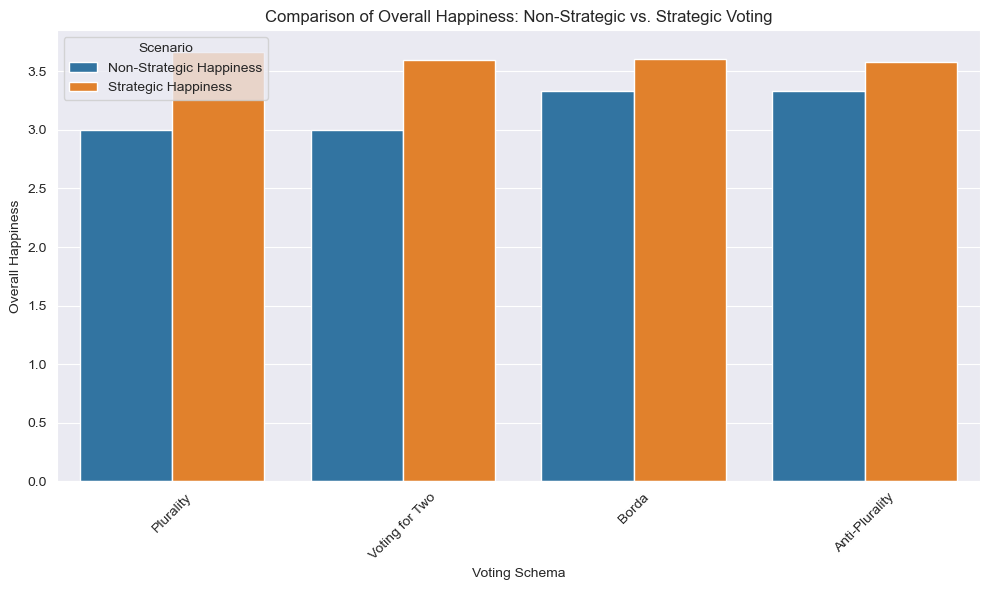

In [3]:
non_strategic_happiness = []
strategic_happiness = []

for schema in list:
    non_strategic_happiness.append(data[schema]['non_strategic_overall_happiness'])
    # Calculate strategic happiness as the average of overall happiness in strategic scenarios
    if data[schema]['voters']:
        strategic_happiness_avg = sum(
            item['overall_happiness'] for sublist in data[schema]['voters'] for item in sublist) / max(
            len([item for sublist in data[schema]['voters'] for item in sublist]), 1)
        strategic_happiness.append(strategic_happiness_avg)

df = pd.DataFrame({
    'Voting Schema': ['Plurality', 'Voting for Two', 'Borda', 'Anti-Plurality'],
    'Non-Strategic Happiness': non_strategic_happiness,
    'Strategic Happiness': strategic_happiness
})

df_melted = df.melt(id_vars=["Voting Schema"], var_name="Type", value_name="Overall Happiness")

plt.figure(figsize=(10, 6))
sns.barplot(x='Voting Schema', y='Overall Happiness', hue='Type', data=df_melted)
plt.title('Comparison of Overall Happiness: Non-Strategic vs. Strategic Voting')
plt.ylabel('Overall Happiness')
plt.xlabel('Voting Schema')
plt.xticks(rotation=45)
plt.legend(title='Scenario')
plt.tight_layout()
plt.show()

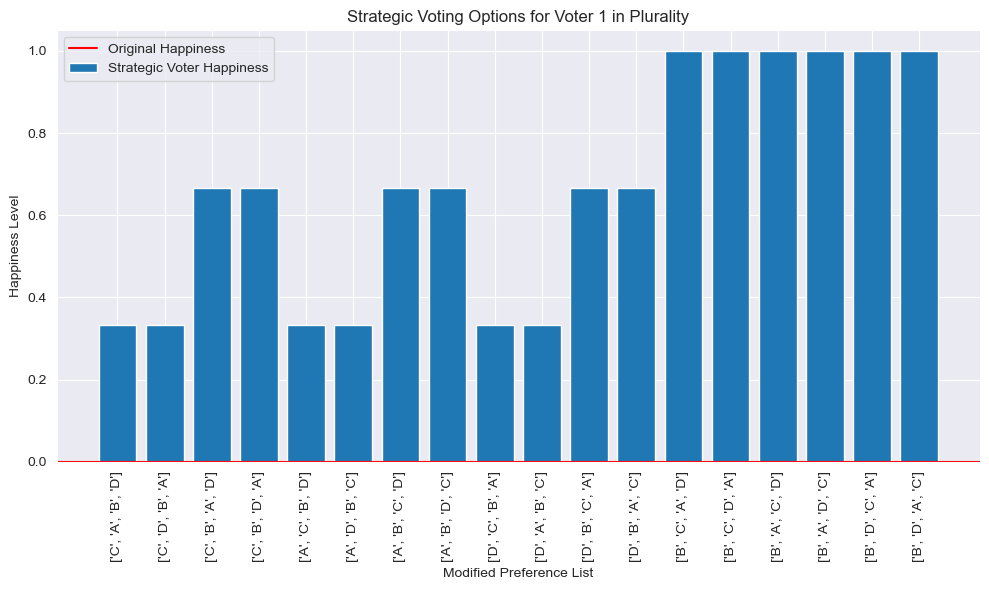

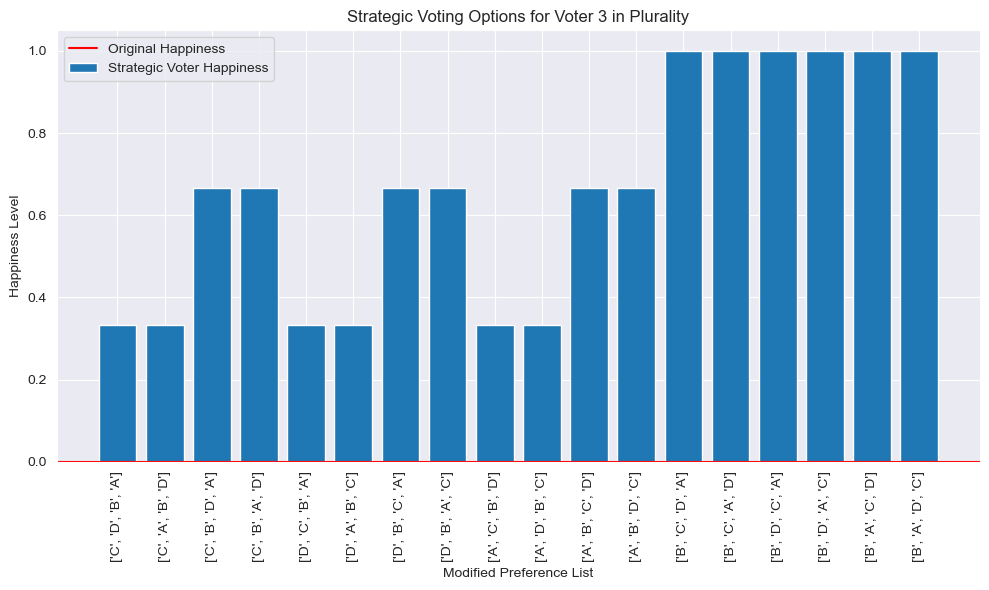

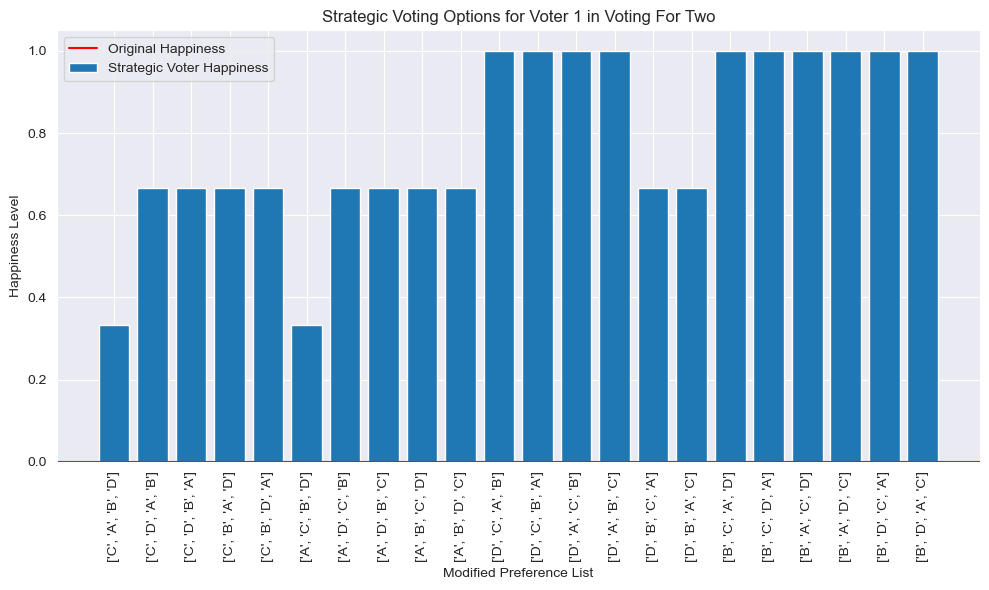

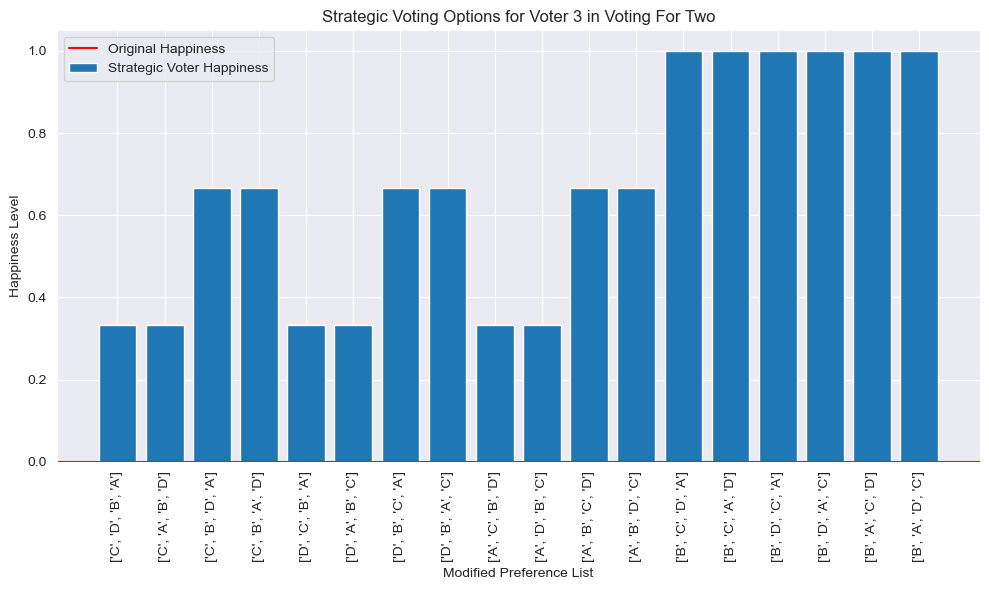

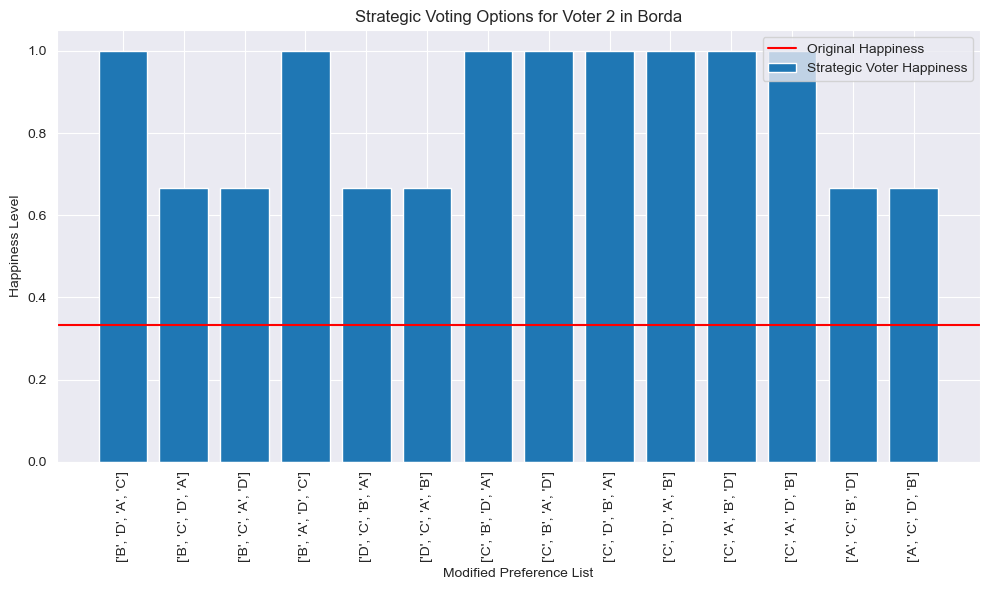

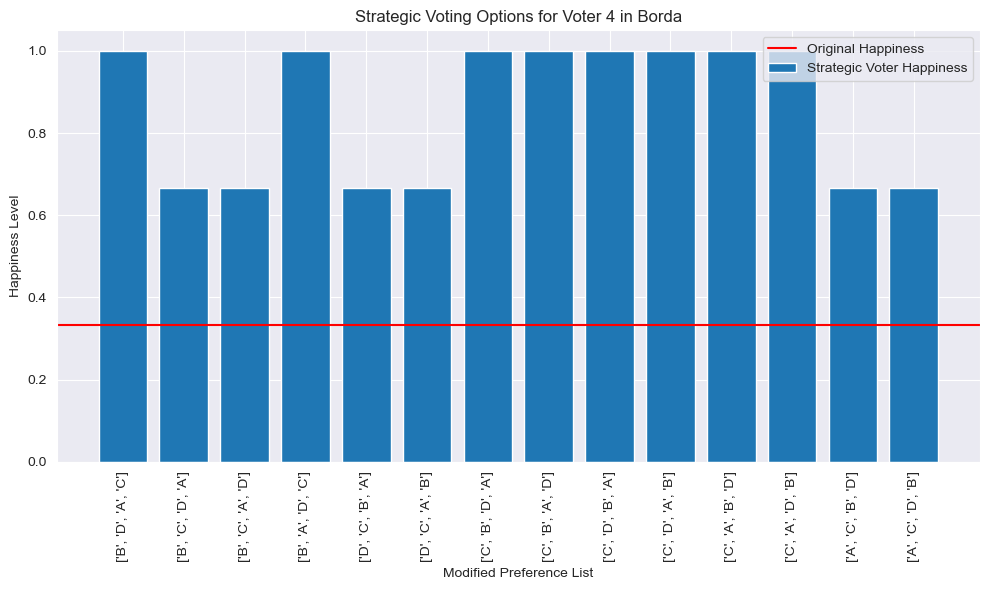

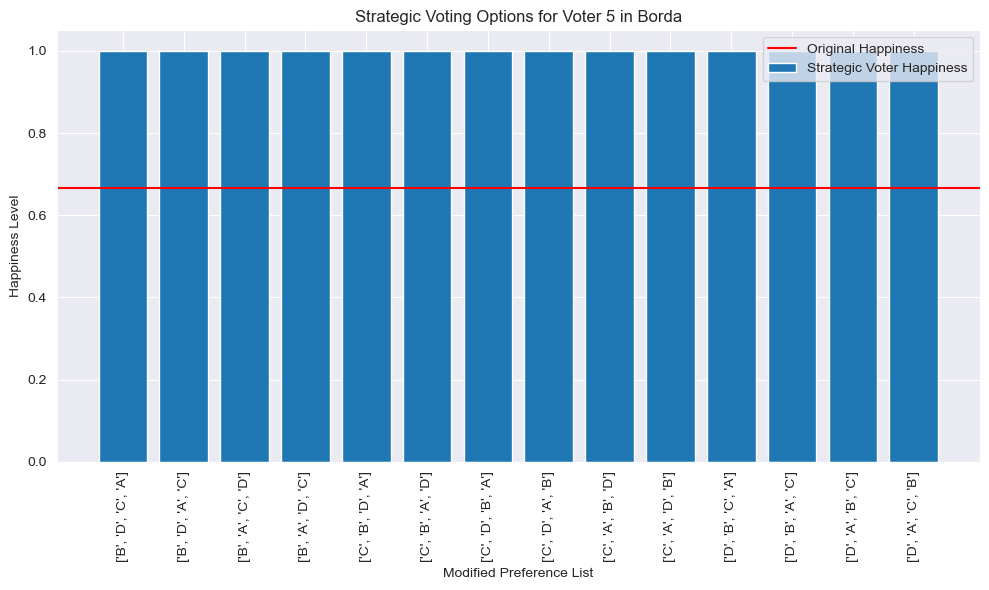

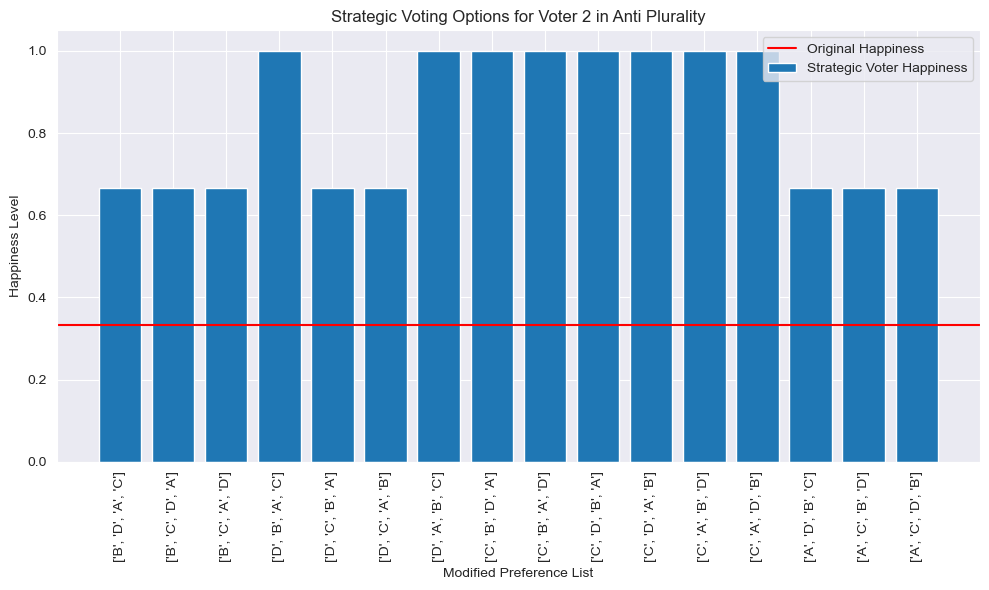

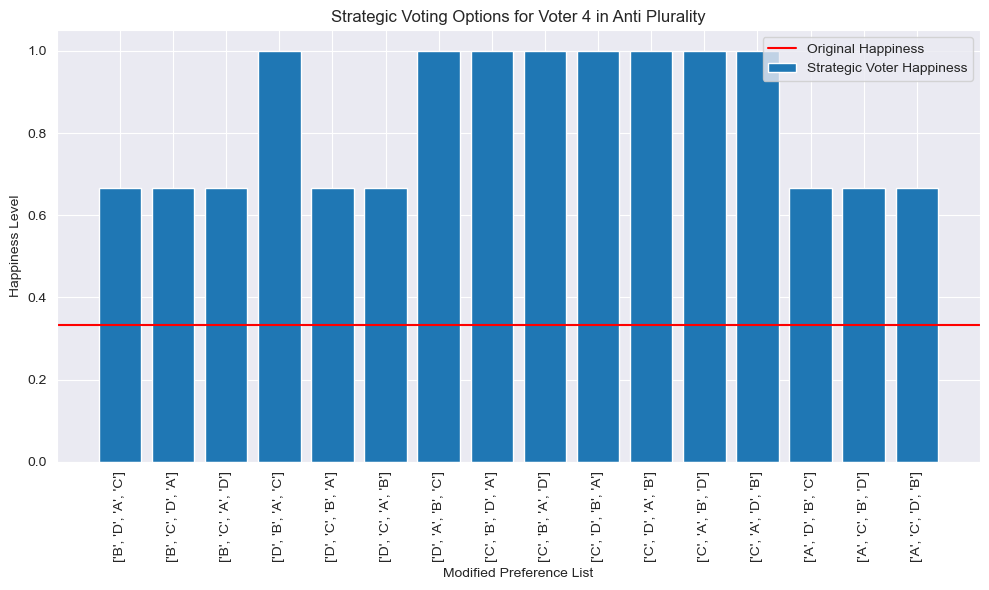

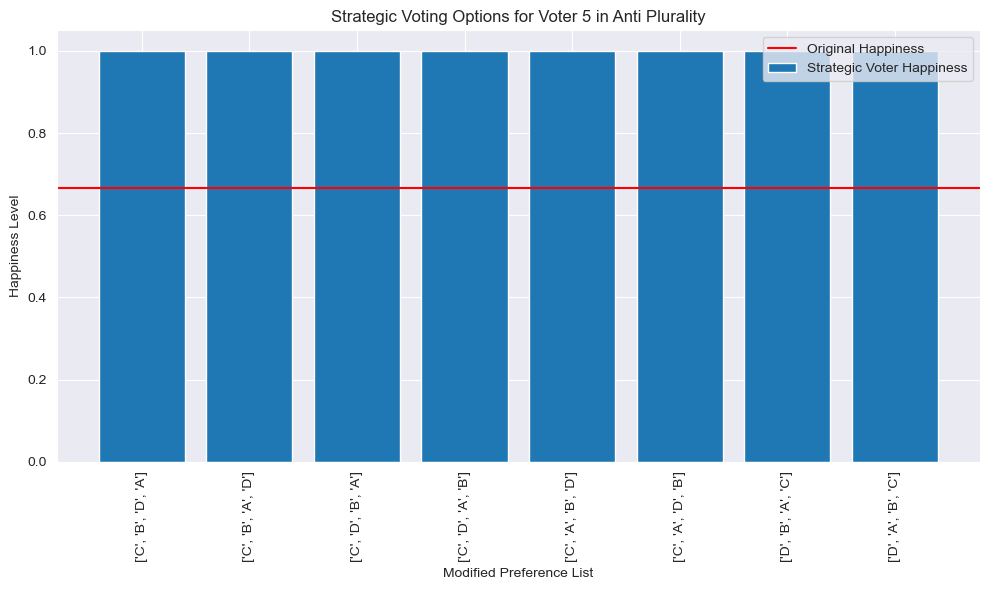

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

for voting_system in list:
    for voter_index in range(voter_count):
        strategic_options = data[voting_system]['voters'][voter_index]

        df_strategic_options = pd.DataFrame({
            'Modified Preference List': [str(option['modified_preference_list']) for option in strategic_options],
            'Voting Outcome': [option['voting_outcome'] for option in strategic_options],
            'Voter Happiness': [option['voter_happiness'] for option in strategic_options],
            'True Voter Happiness': [option['true_voter_happiness'] for option in strategic_options]
        })

        if not df_strategic_options.empty:
            # Plotting
            plt.figure(figsize=(10, 6))
            plt.bar(df_strategic_options.index, df_strategic_options['Voter Happiness'],
                    label='Strategic Voter Happiness')
            plt.axhline(y=data[voting_system]['non_strategic_happiness_levels'][voter_index], color='r', linestyle='-',
                        label='Original Happiness')

            plt.xticks(df_strategic_options.index, df_strategic_options['Modified Preference List'], rotation=90)
            plt.xlabel('Modified Preference List')
            plt.ylabel('Happiness Level')
            plt.title(
                f'Strategic Voting Options for Voter {voter_index + 1} in {voting_system.replace("_", " ").title()}')
            plt.legend()
            plt.tight_layout()
            plt.show()
